# Linear Regresion with One Variable (Lecture: 01)

__Author__: Pablo César Rodríguez Aguayo | MCs in Information Processing (student)

__Subject__: Machine Learning

__Date__: 06/02/2018

# Linear Regresion


## Model Representation
The first goal of a machine learning algorithm is to create a _model*_ htat can be used to estimate _y_ based on _x_. The _hypothesis_, maps the _input values_ to the _output values_. By trainning a model, we can estimate for example the next future value based on the input values. This type of problems is called a _regression problem_, that given some input we obtain a continuous output.
For this case, Linear regresion can be presented as:

### $h_\theta(x) = \theta_0 + \theta_1 x$

Where theta($\theta$) values area the parameters used.

The goal of creating a model is to choose the parameters, so that $h(x)$ is close to the output variable for the trainning data.

# Cost Function (Mean Difference Squared)

The problem in this machine learning problem is to find the proper values of $\theta$ so they feed in the data correctly. So what do we do? First, we need a function that will minimize the parameters over our data. One function that we will be using is: __Mean Squared Error__(Mean Squared Deviation). This function will help us measureing the distance between the estimator(dataset) and the estimated values(prediction values).

The original MSE function looks like this:

### $MSE = \frac{1}{n}\sum _{i = 1}^{n}(Y_i - \hat{Y_i})^2$

To find out good values for the parameters, we want to minimize the difference between the calculated results and the actual results of our data. So we substract:

### $h_\theta(x^{(i)}) - y^i$

Now we do this for all $i$ from 1 to $m$. Since we want to calculate the sum over the difference and then calculate the average by multiplying the sum by $\frac{1}{n}$, getting as a result:

### $J(\theta_0, \theta_1) = \frac{1}{m}\sum _{i = 1}^{m}(h_\theta(x^{i}) - y^i)^2$

So now, we will call $J(\theta_0, \theta_1)$ the cost function. In this function, we have all the right values to fit the model into our data, but now we have the problem of finding the right values. So how do we do this?


# Gradient Descent
To find the proper values that fit our model we use the _Gradient Descent Algorithm_. The Gradient Descent is a general function for minimizing a function, in this case the Mean Square Error Cost Function.

What Gradient Descent basically does is iterate over the theta values one by one until we arrive at a minimum or at least get close to it.

So first, we initialize the parameters in 0, and start from there to search for the values.

### $\theta_j := \theta_j - \alpha\frac{\partial }{\partial \theta_i}J(\theta_0, \theta_1)$ (for j = 0 and j = 0)

where $\alpha$ is the _learning rate_ or how quickly the algorithm will move towards the minimum value. We have to consider that __If $\alpha$ is too large, we can overshoot the learning.__

![Gradient Descend Algorithm Visualization](img/gda.png)

In conclusion, we have a hypothesis:

##### $h_\theta(x) = \theta_0 + \theta_1 x$

that we want to fit in our trainning data so we use a Mean Squared Error function:

#### $MSE = \frac{1}{n}\sum _{i = 1}^{n}(Y_i - \hat{Y_i})^2$

wich we can minimize using the Gradient Descend algorithm:
#####  $\theta_j := \theta_j - \alpha\frac{\partial }{\partial \theta_i}J(\theta_0, \theta_1)$ (for j = 0 and j = 0)

Obtainning the first machine learning algorithm called: Linear Regression. Putting it together the partial derivate of the cost function:

$\frac{\partial }{\partial \theta_i}$

we obtain:

#### repeat until convergence {
####     $\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum _{i = 1}^{m}(h_\theta(x^{i}) - y^i)$
####     $\theta_0 := \theta_0 - \alpha\frac{1}{m}\sum _{i = 1}^{m}(h_\theta(x^{i}) - y^i)x^{(i)}$
#### }

# Code Implementation

In [1]:
%matplotlib inline
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from terminaltables import AsciiTable
from numpy.polynomial.polynomial import polyfit
sns.set(color_codes=True)

In [2]:
# Mean Square Error Function
def calculate_MSE(theta_0, theta_1, data_):
    totalError = 0
    for i in range(0, len(data_)):
        x = data_[i, 0]
        y = data_[i, 1]
        totalError += ((theta_0 + theta_1 * x) - y) ** 2
    return totalError/float(len(data_))

In [3]:
# Correct: Simultaneous update J
def correct_update(theta_0, theta_1, data_, alpha):
    temp0 = 0
    temp1 = 0
    M = float(len(data_))
    for i in range(0, int(M)):
        x = data_[i, 0]
        y = data_[i, 1]
        temp0 += (theta_0 + (theta_1 * x) - y)
        temp1 += (theta_0 + (theta_1 * x) - y) * x
    new_theta_0 = theta_0 - (alpha * temp0)/M
    new_theta_1 = theta_1 - (alpha * temp1)/M
    return [new_theta_0, new_theta_1] 

In [4]:
# Gradient Descent Algorithm
def calculate_GDA(data_, strt_theta_0, strt_theta_1, alpha, iterations):
    theta_0 = strt_theta_0
    theta_1 = strt_theta_1
    for i in range(iterations):
        theta_0, theta_1 = correct_update(theta_0, theta_1, np.array(data_), alpha)
    return [theta_0, theta_1]

In [18]:
# plot table
def plot_graph(df,theta_0,theta_1):
    Y = theta_0 + theta_1 * df.x
    t0, t1 = polyfit(df.x, Y, 1)
    plt.title('Electrical Failures per Decade in the State of Zacatecas')
    plt.ylabel('Failures')
    plt.xlabel('Years')
    plt.plot(df.x, df.y, '.', label='h(x)={0} + {1}x'.format(theta_0, theta_1))
    plt.plot(df.x, t0 + t1 * df.x, '-')
    plt.show()

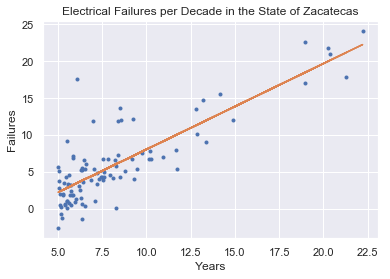

+------------+---------------+
| Parameter  | Value         |
+------------+---------------+
| Iterations | 1500          |
| Theta 0    | -3.6302914394 |
| Theta 1    | 1.16636235034 |
| Error      | 8.96677651318 |
+------------+---------------+
Prediction for 2050: 54.6878260774


In [19]:
# main
def main():
    np.set_printoptions(precision=300)
    data = np.genfromtxt("data.csv", delimiter=",")
    alpha = 0.01 # learning rate
    theta_0 = 0 # interception with y
    theta_1 = 0 # slope of the function
    iterations = 1500
    [theta_0, theta_1] = calculate_GDA(data, theta_0, theta_1, alpha, iterations)
    error = calculate_MSE(theta_0, theta_1, data)
    
    table_data = [
        ['Parameter', 'Value'],
        ['Iterations', '{0}'.format(iterations)],
        ['Theta 0', '{0}'.format(theta_0)],
        ['Theta 1', '{0}'.format(theta_1)],
        ['Error', '{0}'.format(error)]
    ]
    df = pd.DataFrame(data, columns=['x', 'y'])
    plot_graph(df,theta_0,theta_1)
    table = AsciiTable(table_data)

    print(table.table)
    print("Prediction for 2050: {0}".format(theta_0 + theta_1 * 50))
    
    
if __name__ == '__main__':
    if sys.path[0] == '':
        del sys.path[0]
    main()